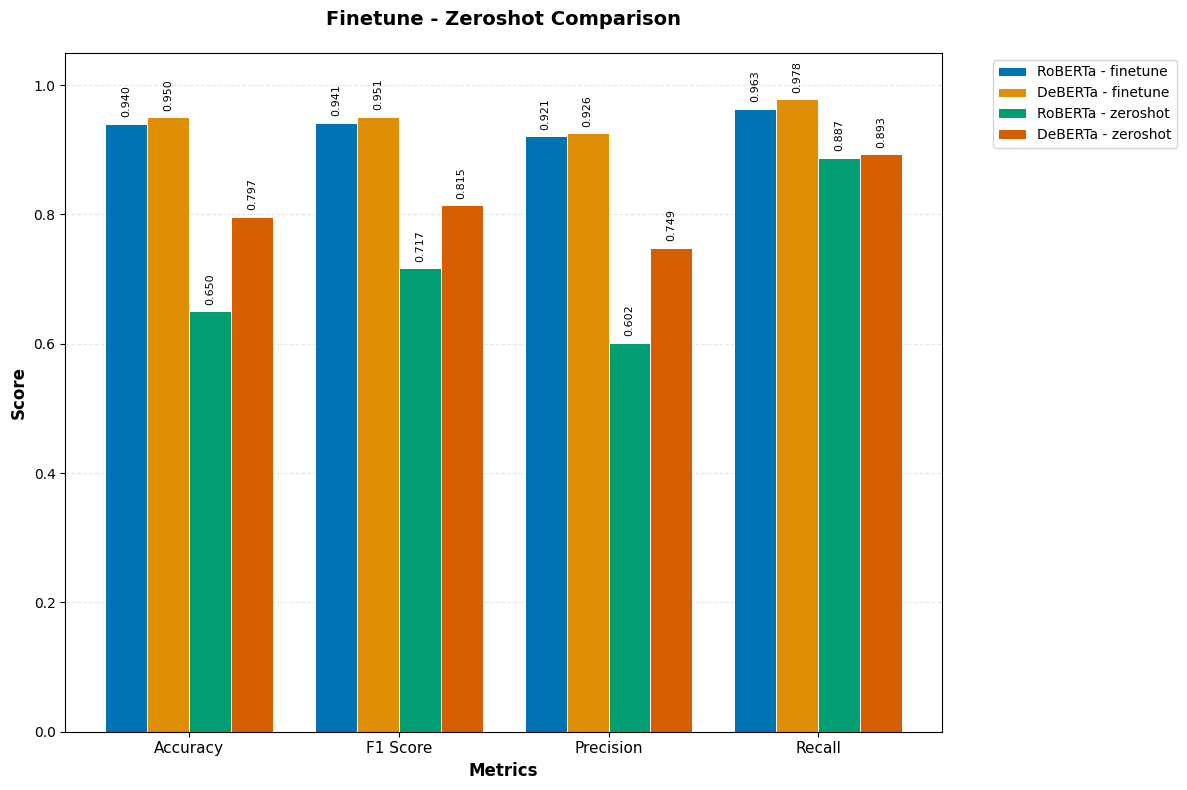

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set up the plot style
plt.style.use('default')
sns.set_palette("colorblind")

# Data
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
models = ['RoBERTa - finetune', 'DeBERTa - finetune', 'RoBERTa - zeroshot', 'DeBERTa - zeroshot']
scores = [
    [0.94024, 0.94146, 0.92056, 0.96333],
    [0.95, 0.95125, 0.92593, 0.978],
    [0.6501, 0.7171, 0.6017, 0.8874],
    [0.7968, 0.8146, 0.7487, 0.8934]
]

# Colorblind-friendly colors (using seaborn's colorblind palette)
colors = sns.color_palette("colorblind", len(models))

# Create figure with larger size
fig, ax = plt.subplots(figsize=(12, 8))

# Set up bar positions
x = np.arange(len(metrics))
width = 0.2

# Create bars for each model
for i, (model, color) in enumerate(zip(models, colors)):
    model_scores = scores[i]  # Each row in scores corresponds to one model
    ax.bar(x + i*width, model_scores, width, label=model, color=color, 
           edgecolor='white', linewidth=0.7)

# Customize the plot
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Finetune - Zeroshot Comparison', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(metrics, fontsize=11)
ax.set_ylim(0, 1.05)

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Customize legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add value labels on bars (optional - remove if too cluttered)
for i, (model, color) in enumerate(zip(models, colors)):
    model_scores = scores[i]  # Each row in scores corresponds to one model
    for j, score in enumerate(model_scores):
        ax.text(j + i*width, score + 0.01, f'{score:.3f}', 
                ha='center', va='bottom', fontsize=8, rotation=90)

# Improve layout
plt.tight_layout()
plt.show()

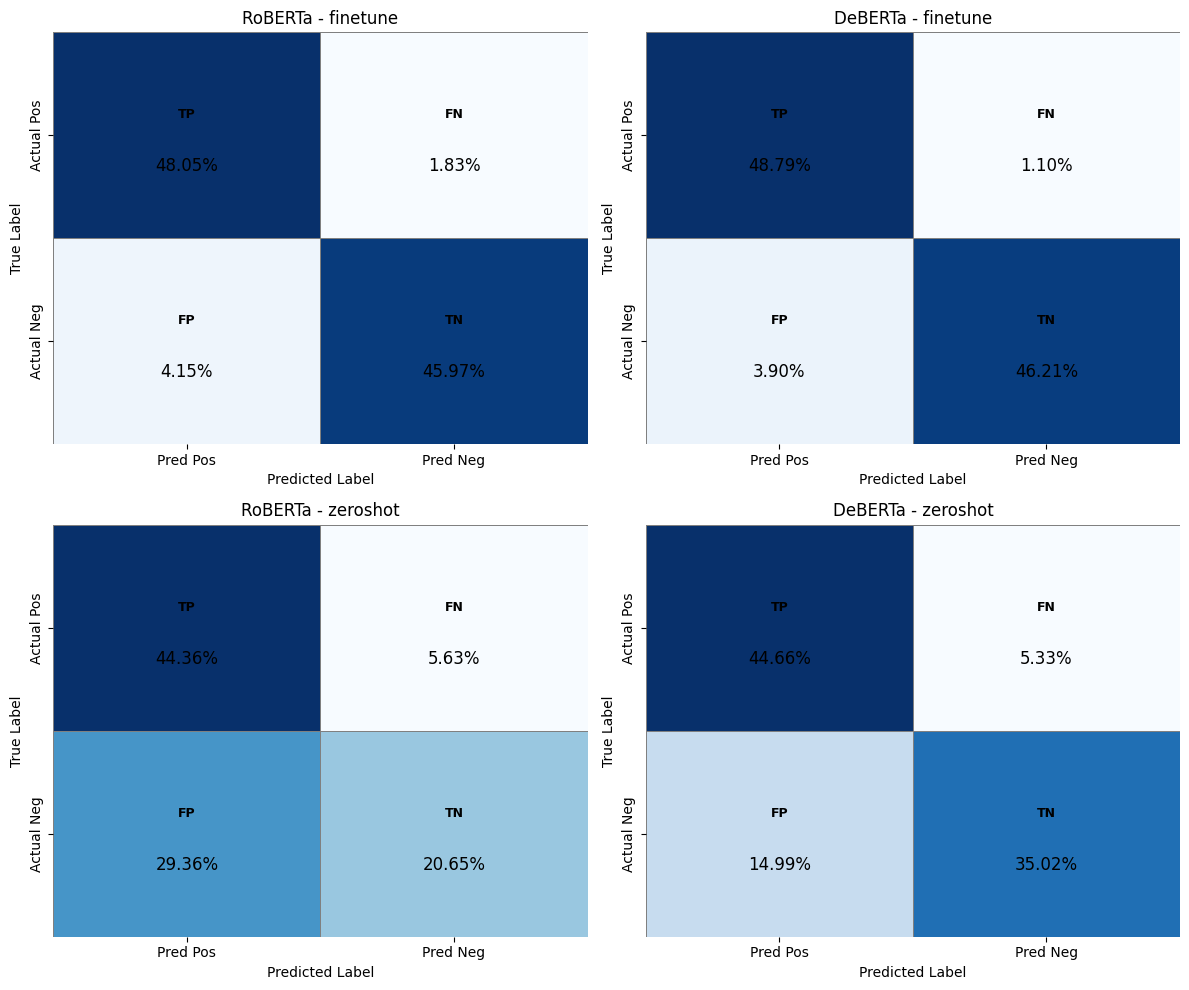

In [15]:
# Confusion matrix labels
cell_labels = [["TP", "FN"], ["FP", "TN"]]
xticks = ["Pred Pos", "Pred Neg"]
yticks = ["Actual Pos", "Actual Neg"]

# Function to compute relative confusion matrix
def compute_relative_confusion_matrix(accuracy, precision, recall):
    fp_factor = 1 / precision - 1
    fn_factor = 1 / recall - 1
    t = (1 - accuracy) / (fp_factor + fn_factor)

    tp = t
    fp = t * fp_factor
    fn = t * fn_factor
    tn = accuracy - t

    return np.array([[tp, fn], [fp, tn]])

# Plotting configuration
num_models = len(models)
rows, cols = 2, 2  # For 2x2 layout
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through models
for idx, (model_name, model_scores) in enumerate(zip(models, scores)):
    accuracy, _, precision, recall = model_scores
    cm = compute_relative_confusion_matrix(accuracy, precision, recall)
    cm_percent = cm * 100
    ax = axes[idx]

    # Plot heatmap
    sns.heatmap(cm_percent, annot=False, fmt=".2f", cmap="Blues",
                xticklabels=xticks, yticklabels=yticks,
                cbar=False, linewidths=0.5, linecolor='gray', ax=ax)

    # Add text values and labels
    for i in range(2):
        for j in range(2):
            value = cm_percent[i, j]
            label = cell_labels[i][j]
            text_color = 'white' if value > 50 else 'black'
            ax.text(j + 0.5, i + 0.4, label, ha='center', va='center',
                    color=text_color, fontsize=9, weight='bold')
            ax.text(j + 0.5, i + 0.65, f"{value:.2f}%", ha='center', va='center',
                    color=text_color, fontsize=12)

    ax.set_title(model_name)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

# Hide any extra axes if models < rows * cols
for idx in range(len(models), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()
